# Load the data relative to the county profiles in California

In [1]:
%matplotlib inline

# Data handling
import pandas as pd
import numpy as np
# import scipy as sp

# Graphing capabilities
import matplotlib.pyplot as plt
# import seaborn as sns

import json

Load data for all counties

In [2]:
fin= open('raw/Population_AgeGroup_byCounty.csv','r')
# header
line= fin.readline()
header= line.strip().split(',')[1:]

fin.seek(0)
data_pop= np.loadtxt(fin, delimiter=',', skiprows=1, usecols=(1,2,3,4,5), dtype=np.int)
fin.seek(0)
counties= np.loadtxt(fin, delimiter=',', skiprows=1, usecols=(0,), dtype=np.str)

fin.close()

In [3]:
N_counties = len(counties)
print 'Found %d counties' % N_counties

Found 58 counties


In [4]:
datacumsum_pop= np.cumsum(data_pop,axis=1)[:,:-1]
total= data_pop[:,4]

Check sums

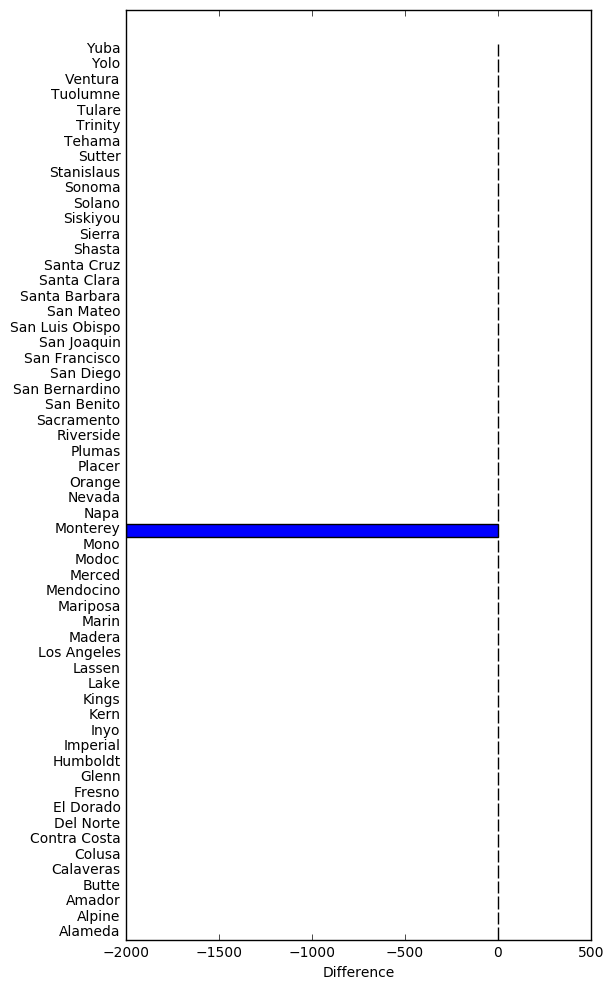

In [5]:
plt.figure(figsize=(6,12))
ax= plt.subplot(111)

inds= np.arange(N_counties)

plt.barh(inds, data_pop[:,4]-datacumsum_pop[:,3])

plt.yticks(inds+0.5,counties)
ax.yaxis.set_ticks_position('none')
plt.xlabel('Difference')

Monterey county has a problem with the counting

In [6]:
ind_tmp= np.where(counties=='Monterey')[0][0]
print datacumsum_pop[ind_tmp,-1] - total[ind_tmp]

2000


Calculate percentage of population in the age groups

In [7]:
100.*data_pop[ind_tmp]/data_pop[ind_tmp][4]

array([   8.26558455,   18.53220279,   61.94520497,   11.72263508,  100.        ])

1st value is wrong: it should be 7.8%

In [8]:
data_pop[ind_tmp][0] -= 2000
100.*data_pop[ind_tmp][0]/total[ind_tmp]

7.799957162280457

In [12]:
datacumsum_pop= np.cumsum(data_pop,axis=1)[:,:-1]
print 'The population numnber should be %d with a fraction of %.1f%%' % (data_pop[ind_tmp,0], 100.*data_pop[ind_tmp,0]/total[ind_tmp])

The population numnber should be 33503 with a fraction of 7.8%


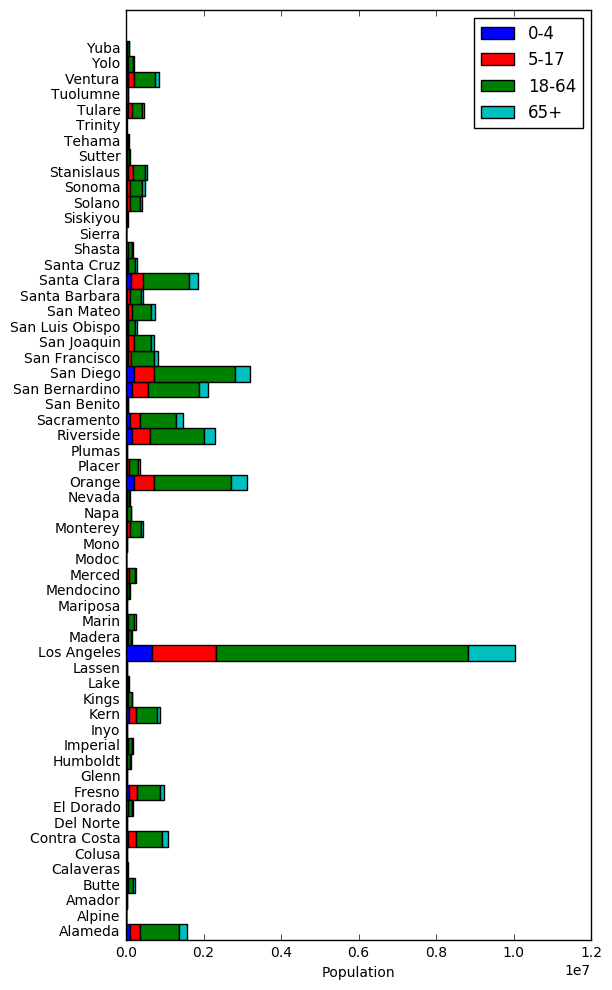

In [13]:
plt.figure(figsize=(6,12))
ax= plt.subplot(111)

inds= np.arange(N_counties)
width= 1

plt.barh(inds, data_pop[:,0], height=width, color='b', label=header[0])
plt.barh(inds, data_pop[:,1], height=width, left=datacumsum_pop[:,0], color='r', label=header[1])
plt.barh(inds, data_pop[:,2], height=width, left=datacumsum_pop[:,1], color='g', label=header[2])
plt.barh(inds, data_pop[:,3], height=width, left=datacumsum_pop[:,2], color='c', label=header[3])

plt.legend()
plt.yticks(inds+0.5,counties)
ax.yaxis.set_ticks_position('none')
plt.xlabel('Population')

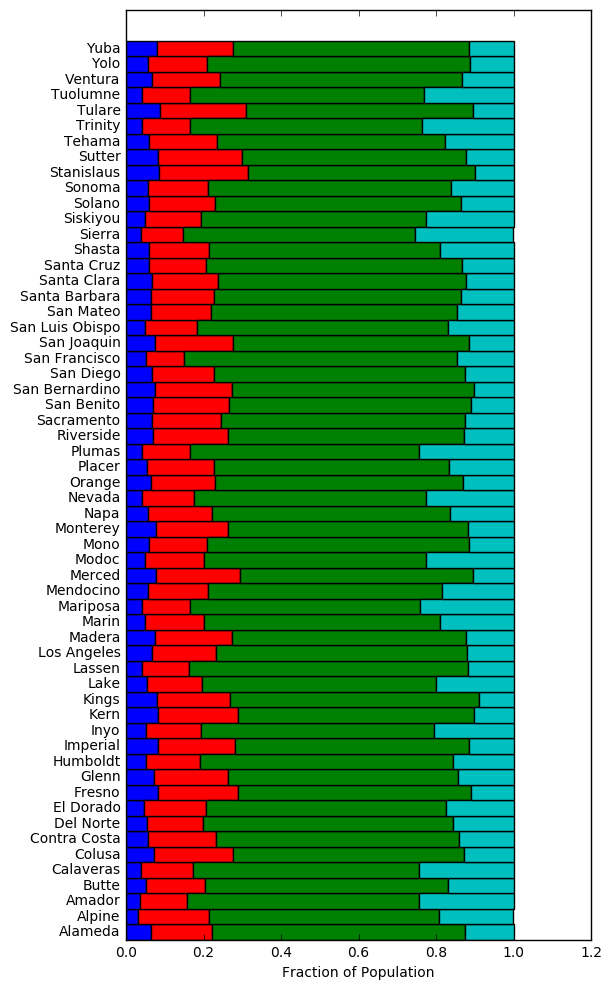

In [14]:
plt.figure(figsize=(6,12))
ax= plt.subplot(111)

inds= np.arange(N_counties)
width= 1

plt.barh(inds, 1.*data_pop[:,0]/total, height=width, color='b', label=header[0])
plt.barh(inds, 1.*data_pop[:,1]/total, height=width, left=1.*datacumsum_pop[:,0]/total, color='r', label=header[1])
plt.barh(inds, 1.*data_pop[:,2]/total, height=width, left=1.*datacumsum_pop[:,1]/total, color='g', label=header[2])
plt.barh(inds, 1.*data_pop[:,3]/total, height=width, left=1.*datacumsum_pop[:,2]/total, color='c', label=header[3])

# plt.legend()
plt.yticks(inds+0.5,counties)
ax.yaxis.set_ticks_position('none')
plt.xlabel('Fraction of Population')

*Work on Pandas Save Files*

In [15]:
df = pd.read_csv('corrected/Population_AgeGroup_byCounty.csv')

In [16]:
df

,county,0-4,5-17,18-64,65+,total
0,Alameda,99911,248516,1022113,196707,1567248
1,Alpine,35,210,683,219,1148
2,Amador,1341,4466,22016,9011,36833
3,Butte,11474,33791,140503,37584,223353
4,Calaveras,1692,6109,26210,10992,45004
5,Colusa,1590,4524,13132,2837,22083
6,Contra Costa,62767,189096,679089,153863,1084815
7,Del Norte,1511,4144,18464,4430,28549
8,El Dorado,8414,29251,112898,31798,182360
9,Fresno,79872,199933,585623,107296,972724
